El objetivo de este documento es saber si el análisis es robusto.

In [1]:
#instalación de librerías

#!pip install pandas
#!pip install scikit-learn
#!pip install numpy
#!pip install matplotlib

In [2]:
#Correr las librerías
import pandas as pd 
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [3]:
#Importar archivos 
aplicaciones = pd.read_csv('Aplicaciones2.csv')

In [9]:
#EDA 
aplicaciones.info()
print() 
print("Se observan títulos erróneos, inconsistencia en cantidad de datos y tipo de datos. Se necesita limpieza.")
print() 

display(aplicaciones.head())
print(aplicaciones.columns)

<class 'pandas.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aplicación               412 non-null    int64  
 1   Empresa                  226 non-null    str    
 2   Posición                 228 non-null    str    
 3   Fecha                    213 non-null    str    
 4   Informacion de contacto  38 non-null     str    
 5   Resultado al momento     54 non-null     str    
 6   url                      211 non-null    str    
 7   Bolsas de presencia:     219 non-null    str    
 8   Detalles                 37 non-null     str    
 9   Unnamed: 9               2 non-null      str    
 10  Junta ARC                231 non-null    float64
 11  Unnamed: 11              1 non-null      str    
dtypes: float64(1), int64(1), str(10)
memory usage: 38.8 KB

Se observan títulos erróneos, inconsistencia en cantidad de datos y tipo de datos. Se nec

,Aplicación,Empresa,Posición,Fecha,Informacion de contacto,Resultado al momento,url,Bolsas de presencia:,Detalles,Unnamed: 9,Junta ARC,Unnamed: 11
0,1,Idis,linked in referido ARC,22/10/25,NaN,aplique,NaN,NaN,NaN,NaN,1.0,NaN
1,2,Amaris,linked in referido ARC,22/10/25,NaN,Decidieron no continar se quedaron los datos,NaN,NaN,NaN,NaN,1.0,NaN
2,3,Smilepill,linked in referido ARC,22/10/25,NaN,aplique,NaN,NaN,NaN,NaN,1.0,NaN
3,4,Adam Milo,linked in referido ARC,22/10/25,NaN,aplique,NaN,NaN,NaN,NaN,1.0,NaN
4,5,Incode,linked in data search - greenhouse,29/10/25,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,NaN,2.0,NaN


Index(['Aplicación', 'Empresa', 'Posición ', 'Fecha',
       'Informacion de contacto', 'Resultado al momento', 'url',
       'Bolsas de presencia: ', 'Detalles', 'Unnamed: 9', 'Junta ARC',
       'Unnamed: 11'],
      dtype='str')


In [19]:
#Cambio de plataforma por posición 
aplicaciones.rename(columns={'Posición ': 'Posicion'}, inplace=True)
print(aplicaciones.columns)


Index(['Aplicación', 'Empresa', 'Posicion', 'Fecha', 'Informacion de contacto',
       'Resultado al momento', 'url', 'Bolsas de presencia: ', 'Detalles',
       'Unnamed: 9', 'Junta ARC', 'Unnamed: 11'],
      dtype='str')


In [20]:

print("Título de columna cambiado de Posición a Posicion.")

#Soltar valores donde no haya posicion 
aplicaciones = aplicaciones.dropna(subset=['Posicion'])
aplicaciones.info()

Título de columna cambiado de Posición a Posicion.
<class 'pandas.DataFrame'>
Index: 228 entries, 0 to 230
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aplicación               228 non-null    int64  
 1   Empresa                  224 non-null    str    
 2   Posicion                 228 non-null    str    
 3   Fecha                    210 non-null    str    
 4   Informacion de contacto  38 non-null     str    
 5   Resultado al momento     52 non-null     str    
 6   url                      209 non-null    str    
 7   Bolsas de presencia:     217 non-null    str    
 8   Detalles                 37 non-null     str    
 9   Unnamed: 9               2 non-null      str    
 10  Junta ARC                228 non-null    float64
 11  Unnamed: 11              1 non-null      str    
dtypes: float64(1), int64(1), str(10)
memory usage: 23.2 KB


In [21]:

#Remover columna 9, sin valor 
aplicaciones = aplicaciones.drop(columns=['Unnamed: 9', 'Unnamed: 11'])

print(aplicaciones.columns,  '\n Columna sin valores y no nombrada eliminada.')

Index(['Aplicación', 'Empresa', 'Posicion', 'Fecha', 'Informacion de contacto',
       'Resultado al momento', 'url', 'Bolsas de presencia: ', 'Detalles',
       'Junta ARC'],
      dtype='str') 
 Columna sin valores y no nombrada eliminada.


In [22]:
#Se ocupan cambiar el número de junta de float a int64. 
#Limpieza y homogenización de datos. 
#display(aplicaciones)
#print("Puedo rellenar los NAN en junta pendientes conforme a contexto.")
#aplicaciones['Junta ARC'] = aplicaciones['Junta ARC'].fillna(5)
print('Cantidad de Nan en Junta ARC:', aplicaciones['Junta ARC'].isnull().sum()) #Corroborar que no haya NAN

#Cambiar tipo de dato de float a int64
aplicaciones['Junta ARC'] = aplicaciones['Junta ARC'].astype('int64')

#Rellenar nulos en bolsas de presencia con post de linkedin o referido
aplicaciones['Bolsas de presencia: '] = aplicaciones['Bolsas de presencia: '].fillna('LinkedIn / Referido')
#Renombrar columna bolsas de presencia a canal
aplicaciones.rename(columns={'Bolsas de presencia: ': 'Canal'}, inplace=True)


Cantidad de Nan en Junta ARC: 0


In [23]:
#Corroborar que no haya NAN
print('Cantidad de Nan en Canal:', aplicaciones['Canal'].isnull().sum())

display(aplicaciones)

#Convertir fecha en datetime 
aplicaciones['Fecha'] = pd.to_datetime(aplicaciones['Fecha'], format='%d/%m/%y', errors='coerce')
display(aplicaciones)

Cantidad de Nan en Canal: 0


,Aplicación,Empresa,Posicion,Fecha,Informacion de contacto,Resultado al momento,url,Canal,Detalles,Junta ARC
0,1,Idis,linked in referido ARC,22/10/25,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
1,2,Amaris,linked in referido ARC,22/10/25,NaN,Decidieron no continar se quedaron los datos,NaN,LinkedIn / Referido,NaN,1
2,3,Smilepill,linked in referido ARC,22/10/25,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
3,4,Adam Milo,linked in referido ARC,22/10/25,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
4,5,Incode,linked in data search - greenhouse,29/10/25,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,2
...,...,...,...,...,...,...,...,...,...,...
226,227,Redwood,Data Analyst,NaN,NaN,NaN,https://www.glassdoor.com.mx/partner/jobListin...,glassdoor,NaN,6
227,228,Simera,Data Engineer,NaN,NaN,NaN,https://torre.ai/post/GdjqEJXw-simera-data-eng...,torre,NaN,6
228,229,Indi Staffing Services,Power Bi Junior Analyst,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/4368650483/...,linkedin,NaN,6
229,230,Grupo Autofin,Analista,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/4350246433/...,linkedin,"sueldo muy bajo, 10000",6


,Aplicación,Empresa,Posicion,Fecha,Informacion de contacto,Resultado al momento,url,Canal,Detalles,Junta ARC
0,1,Idis,linked in referido ARC,2025-10-22,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
1,2,Amaris,linked in referido ARC,2025-10-22,NaN,Decidieron no continar se quedaron los datos,NaN,LinkedIn / Referido,NaN,1
2,3,Smilepill,linked in referido ARC,2025-10-22,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
3,4,Adam Milo,linked in referido ARC,2025-10-22,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
4,5,Incode,linked in data search - greenhouse,2025-10-29,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,2
...,...,...,...,...,...,...,...,...,...,...
226,227,Redwood,Data Analyst,NaT,NaN,NaN,https://www.glassdoor.com.mx/partner/jobListin...,glassdoor,NaN,6
227,228,Simera,Data Engineer,NaT,NaN,NaN,https://torre.ai/post/GdjqEJXw-simera-data-eng...,torre,NaN,6
228,229,Indi Staffing Services,Power Bi Junior Analyst,NaT,NaN,NaN,https://www.linkedin.com/jobs/view/4368650483/...,linkedin,NaN,6
229,230,Grupo Autofin,Analista,NaT,NaN,NaN,https://www.linkedin.com/jobs/view/4350246433/...,linkedin,"sueldo muy bajo, 10000",6


In [24]:
#Rango de fechas 
aplicaciones['Fecha'].unique()
#Rellenar con fecha mínima
aplicaciones['Fecha'] = aplicaciones['Fecha'].fillna(pd.to_datetime('2025-12-05'))
print("Fechas nulas rellenadas con fecha mínima. Para análisis temporal")

Fechas nulas rellenadas con fecha mínima. Para análisis temporal


Objetivo de Análisis

1. Identificar cantidad de aplicaciones 
2. Cuantas por cada canal 
3. Identificar las empresas a las que se han aplicado. 



In [25]:
print("Aplicaciones por canal previo a limpieza:")
print(aplicaciones['Canal'].value_counts())

Aplicaciones por canal previo a limpieza:
Canal
occ                                           40
linkedin                                      35
indeed                                        30
glassdoor                                     23
ct                                            15
LinkedIn / Referido                           11
indeed                                         8
linkedin                                       6
Linkedin                                       5
sitio de la empresa                            5
greenhouse                                     4
Indeed                                         3
CT                                             3
torre/sitio de la empresa                      3
Computrabajo                                   2
linked in                                      2
Glassdoor                                      2
linked in                                      2
computrabajo                                   2
OCC                  

In [26]:
#Cuantas por cada canal 
#print(aplicaciones['Canal'].value_counts())

#Renombrar valores equivalentes en canal 
#Linkedin, linkedin, linked in, Glassdoor, glassdoor, OCC, occ, remote, torre, femsa, otros
aplicaciones['Canal_limpio'] = (aplicaciones['Canal'].str.lower()
    .str.replace(r"\s+", "", regex=True)
)

#Estandarizar nombres de canales
aplicaciones['Canal_limpio'] = aplicaciones['Canal'].replace({'linkedin': 'LinkedIn',
'linked in': 'LinkedIn', 'linked in' : 'LinkedIn', 'Linkedin': 'LinkedIn', 'Glassdoor': 'Glassdoor', 'glassdoor': 'Glassdoor',
'OCC': 'OCC', 'occ': 'OCC', 'remote': 'Remote', 'torre': 'Torre', 'torre ai': 'Torre', 'femsa': 'Femsa', 'ct': 'CT', 'computrabajo' : 'CT', 'Computrabajo': 'CT' })

condiciones = [
    aplicaciones['Canal_limpio'].str.contains('linkedin', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('linked in', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('femsa', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('joinrs', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('torre', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('ct', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('glassdoor', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('Glassdoor', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('braintrust', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('indeed', case=False, na=False)
               ]
opciones = [
    'LinkedIn',
    'LinkedIn',
    'Femsa',
    'Joinrs',
    'Torre',
    'CT',
    'Glassdoor',
    'Glassdoor',
    'Braintrust',
    'Indeed'
]

aplicaciones['Canal_limpio'] = np.select(condiciones, opciones, default=aplicaciones['Canal_limpio'])

#Definir otros 
freq = aplicaciones['Canal_limpio'].value_counts()
aplicaciones['Canal_limpio'] = aplicaciones['Canal_limpio'].where(aplicaciones['Canal_limpio'].map(freq) > 5, 'Otros')

#Cantidad de aplicaciones por canal limpio
print("Aplicaciones por canal después de limpieza:")
print(aplicaciones['Canal_limpio'].value_counts())

Aplicaciones por canal después de limpieza:
Canal_limpio
LinkedIn     68
OCC          42
Indeed       41
Glassdoor    27
CT           23
Otros        20
Torre         7
Name: count, dtype: int64


In [27]:
#Revisar las posiciones y estandarizar 
print("Posiciones únicas antes de limpieza:")
#print(aplicaciones['Posicion'].unique())

#Hacer una columna de si es Data Analyst o Data Scientist
condiciones_posicion = [
    aplicaciones['Posicion'].str.contains('analyst', case=False, na=False),
    aplicaciones['Posicion'].str.contains('lytics', case=False, na=False),
    aplicaciones['Posicion'].str.contains('list', case=False, na=False),
    aplicaciones['Posicion'].str.contains('scientist', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Scientist', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Science', case=False, na=False),
    aplicaciones['Posicion'].str.contains('science', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Científico', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Cientifico', case=False, na=False),
    aplicaciones['Posicion'].str.contains('científico', case=False, na=False),
    aplicaciones['Posicion'].str.contains('DS', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Ciencia', case=False, na=False),
    aplicaciones['Posicion'].str.contains('ciencia', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Engineer', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Ingeniero', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Tableau', case=False, na=False),
    aplicaciones['Posicion'].str.contains('BI', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Business Intelligence', case=False, na=False),
               ]
opciones_posicion = [
    'Data Analyst',
    'Data Analyst',
    'Data Analyst',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Scientist',
    'Data Engineer',
    'Data Engineer',
    'BI',
    'BI',
    'BI',
]

aplicaciones['tipo_posicion'] = np.select(condiciones_posicion, opciones_posicion, default= aplicaciones['Posicion'])
aplicaciones['tipo_posicion'] = aplicaciones['tipo_posicion'].where(aplicaciones['tipo_posicion'].isin(opciones_posicion), 'Otros')    
print(aplicaciones['tipo_posicion'].unique())

Posiciones únicas antes de limpieza:
<StringArray>
['Otros', 'Data Scientist', 'Data Analyst', 'Data Engineer', 'BI']
Length: 5, dtype: str


In [28]:
#Hacer una columna de si es jr o no
condiciones_jr = [
    aplicaciones['Posicion'].str.contains('jr', case=False, na=False),
    aplicaciones['Posicion'].str.contains('Jr', case=False, na=False),
    aplicaciones['Posicion'].str.contains('junior', case=False, na=False),
]
opciones_jr = [
    '1',
    '1',
    '1',
]
aplicaciones['nivel'] = np.select(condiciones_jr, opciones_jr, default='0')

In [30]:
#Revisar mis datos. 
#Busco saber que quiero exportar y que retirare para pasar a hacer modelos de BI. 

aplicaciones.info()

#Retirar columnas no necesarias
aplicaciones = aplicaciones.drop(columns=['Canal', 'Detalles', 'Resultado al momento', 'Informacion de contacto'])
aplicaciones = aplicaciones.dropna(subset=['Empresa'])


<class 'pandas.DataFrame'>
Index: 228 entries, 0 to 230
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Aplicación               228 non-null    int64         
 1   Empresa                  224 non-null    str           
 2   Posicion                 228 non-null    str           
 3   Fecha                    228 non-null    datetime64[us]
 4   Informacion de contacto  38 non-null     str           
 5   Resultado al momento     52 non-null     str           
 6   url                      209 non-null    str           
 7   Canal                    228 non-null    str           
 8   Detalles                 37 non-null     str           
 9   Junta ARC                228 non-null    int64         
 10  Canal_limpio             228 non-null    str           
 11  tipo_posicion            228 non-null    str           
 12  nivel                    228 non-null    str        

In [31]:
#Observar datos finales 
aplicaciones.info()

#Exportar 
aplicaciones.to_csv('aplicaciones_limpias2.csv', index=False)

<class 'pandas.DataFrame'>
Index: 224 entries, 0 to 230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Aplicación     224 non-null    int64         
 1   Empresa        224 non-null    str           
 2   Posicion       224 non-null    str           
 3   Fecha          224 non-null    datetime64[us]
 4   url            206 non-null    str           
 5   Junta ARC      224 non-null    int64         
 6   Canal_limpio   224 non-null    str           
 7   tipo_posicion  224 non-null    str           
 8   nivel          224 non-null    str           
dtypes: datetime64[us](1), int64(2), str(6)
memory usage: 17.5 KB


Cantidad de aplicaciones: 224


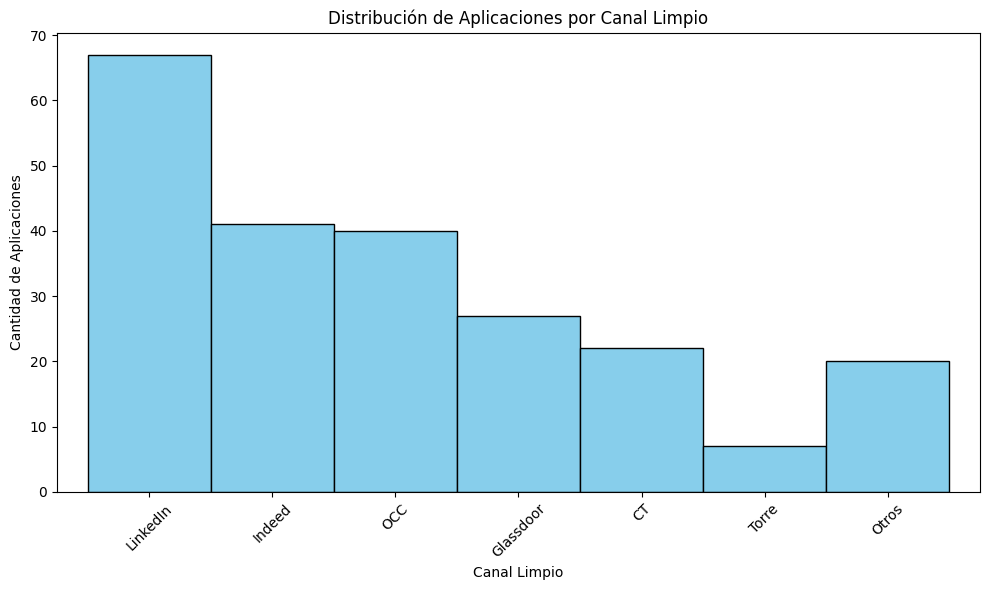

In [32]:
# Cantidad de aplicaciones 
print("Cantidad de aplicaciones:", aplicaciones.shape[0])

#Ordenar los canales para graficar 

counts = aplicaciones['Canal_limpio'].value_counts()

# separar "Otros"
otros = counts[counts.index == 'Otros']
resto = counts[counts.index != 'Otros']

# ordenar el resto por cantidad
resto = resto.sort_values(ascending=False)

# concatenar con "Otros" al final
counts_ordenado = pd.concat([resto, otros])

#Graficar aplicaciones por canal limpio
plt.figure(figsize=(10,6))
counts_ordenado.plot(kind='bar', color='skyblue', edgecolor='black', width=1)
plt.xlabel('Canal Limpio')
plt.ylabel('Cantidad de Aplicaciones')
plt.title('Distribución de Aplicaciones por Canal Limpio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
#Cuantas empresas distintas
print("Cantidad de empresas distintas:", aplicaciones['Empresa'].nunique())

empresas_distintas = aplicaciones['Empresa'].unique()

print('\nLista de empresas distintas:\n')
for e in empresas_distintas: 
    print(e)

Cantidad de empresas distintas: 195

Lista de empresas distintas:

Idis
Amaris
Smilepill
Adam Milo 
Incode
ITJ 
ATOS
Grupo Salinas
Inavant
Grupo Caliente
Encora
Concentrix 
capgemini
Tekton labs
Alten
Packsys
Caliente Casino 
Stefanini Latam
Steris
Sigma 
Flister Reclutamiento Comercial 
Farmacias del ahorro
Best Egg
Lindee
Hone
E contact
Artefact
CLEBER
Rackspace technologies
Constructor
Insight Global
Bancopel
Grupo Ti
Helicon
Informática de América 
Monterrey IT cluster
daltile
improvado 
Remoto workforce
Thermofisher
Nielsen IQ
Randstand
Genestack ltd
UNOSQUARE!!
Hector Sosa
E connect
Sigma
Banregio
Scalepex
IDS comercial 
Mucho Red
grupo ayvi
Invisible
Genestack
Tort Experts
Caterpillar
Improvado
Confidencial 
Sas
ManPowerGroup
Paired
Skydropx
Capgemini
Impulssamex
Tecnoap
caliente casino
wexpand
Lumina Software
Redwood logistics
Dimex 
incFile
Informática Sa de CV
Tecnológico de Monterrey
Avahi
Baufest
Dematic
workspark
Phrac international
ODIX
Braintrust
Dtroy
Envia flores
Fultr

Conclusiones 

1. LinkedIn es la plataforma con mayor uso.

2. 195 empresas han sido contactadas

3. 224 aplicaciones totales. 